In [1]:
import torch as t
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output

In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
mnist_train = datasets.MNIST(root='./data',train=True,download=True,transform=transform)
train_loader = DataLoader(mnist_train,batch_size=64,shuffle=True)
mnist_test = datasets.MNIST(root='./data',train=False,download=True,transform=transform)
test_loader = DataLoader(mnist_test,batch_size=64,shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 132MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 24.1MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 106MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.73MB/s]


In [3]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class fashionmnist(nn.Module):
  def __init__(self):
    super(fashionmnist,self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(28*28,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,10)
    self.relu = nn.ReLU()
  def forward(self,x):
    x = self.flatten(x)
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x
model = fashionmnist()

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [10]:
epochs = 10
train_losses, test_accuracies = [],[]
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    # ---- Training Loop ----
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # ---- Evaluation Loop (once per epoch) ----
    model.eval()
    correct, total = 0, 0
    with t.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = t.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Compute accuracy and print summary
    test_accuracy = 100 * correct / total
    train_losses.append(running_loss / len(train_loader))
    test_accuracies.append(test_accuracy)
    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Loss: {running_loss/len(train_loader):.4f}, "
          f"Test Accuracy: {test_accuracy:.2f}%")


Epoch [1/10], Loss: 0.0389, Test Accuracy: 96.62%
Epoch [2/10], Loss: 0.0344, Test Accuracy: 96.98%
Epoch [3/10], Loss: 0.0329, Test Accuracy: 97.67%
Epoch [4/10], Loss: 0.0324, Test Accuracy: 97.68%
Epoch [5/10], Loss: 0.0289, Test Accuracy: 97.78%
Epoch [6/10], Loss: 0.0267, Test Accuracy: 97.52%
Epoch [7/10], Loss: 0.0298, Test Accuracy: 97.51%
Epoch [8/10], Loss: 0.0233, Test Accuracy: 98.20%
Epoch [9/10], Loss: 0.0236, Test Accuracy: 98.00%
Epoch [10/10], Loss: 0.0245, Test Accuracy: 97.91%


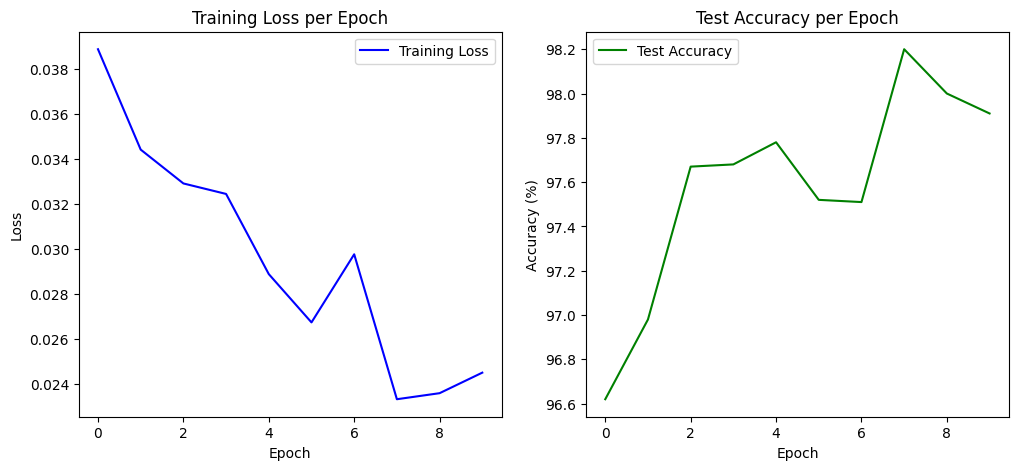

In [11]:
plt.figure(figsize=(12,5))

# Training Loss Curve
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Test Accuracy Curve
plt.subplot(1,2,2)
plt.plot(test_accuracies, label='Test Accuracy', color='green')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


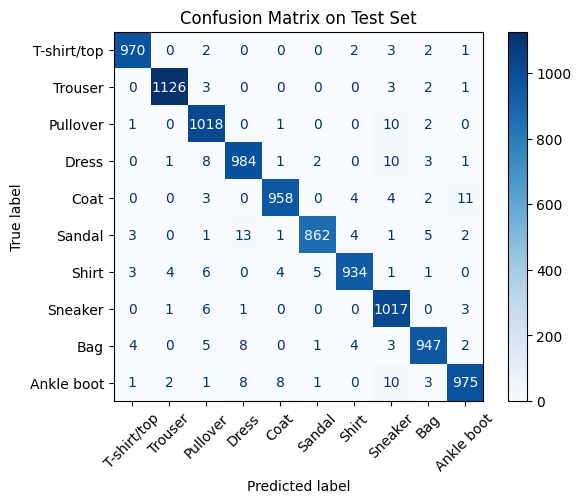

In [12]:
model.eval()
y_true, y_pred = [], []

with t.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = t.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix on Test Set")
plt.show()



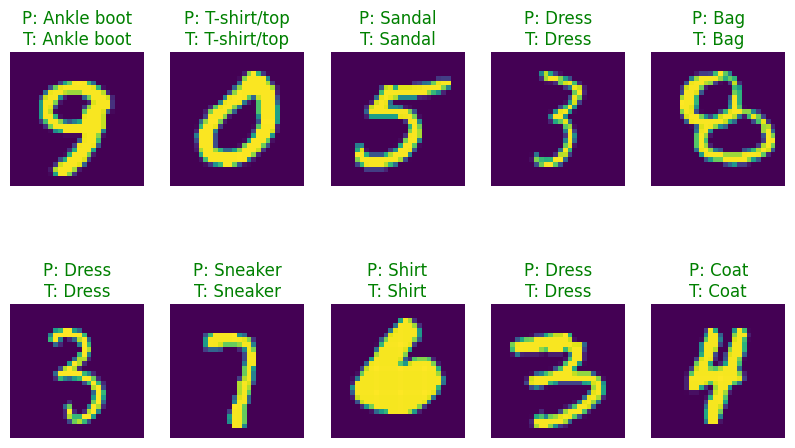

In [14]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize image for display
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Get one batch of test data
dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = t.max(outputs, 1)

# Plot first 10 images
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    imshow(images[i])
    color = 'green' if predicted[i] == labels[i] else 'red'
    plt.title(f"P: {classes[predicted[i]]}\nT: {classes[labels[i]]}", color=color)
plt.show()


In [15]:
final_train_loss = train_losses[-1]
final_test_acc = test_accuracies[-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Test Accuracy: {final_test_acc:.2f}%")


Final Training Loss: 0.0245
Final Test Accuracy: 97.91%


# Conclusion ⚡
The simple MLP achieved a test accuracy of around 97% on the Fashion-MNIST dataset.
The model successfully classified most clothing items, though it occasionally confused similar classes such as Shirt and T-shirt/top.
The results demonstrate that even a simple fully connected neural network can perform well on image classification tasks.
Further improvements could include using dropout layers or convolutional layers for better feature extraction.